<a href="https://colab.research.google.com/github/Soot3/g05-used-cars/blob/master/EDA_usedCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Please note that this notebook contains some interactive plots that might not render on static sites like Github. Opening with Colab is recommended*

# Exploratory Data Analysis: Used Cars

In [1]:
!mkdir file_destination

In [2]:
!unzip '/content/drive/MyDrive/used cars dataset.zip' -d file_destination

Archive:  /content/drive/MyDrive/used cars dataset.zip
  inflating: file_destination/vehicles.csv  


In [3]:
import pandas as pd
df = pd.read_csv('/content/file_destination/vehicles.csv')

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [5]:
df.sample(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
342449,7185889106,https://louisville.craigslist.org/ctd/d/louisv...,louisville,https://louisville.craigslist.org,11995,2016.0,ford,escape,NaN,NaN,gas,112497.0,clean,automatic,1FMCU9J97GUA89762,4wd,NaN,SUV,silver,https://images.craigslist.org/00D0D_3MByG4z0YC...,2016 Ford Escape Titanium AWD 4dr SUV Offe...,NaN,ky,38.1968,-85.7505
71316,7196001472,https://ocala.craigslist.org/ctd/d/hernando-20...,ocala,https://ocala.craigslist.org,16999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
82452,7196701887,https://atlanta.craigslist.org/atl/ctd/d/atlan...,atlanta,https://atlanta.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ga,NaN,NaN
273305,7183957476,https://indianapolis.craigslist.org/cto/d/indi...,indianapolis,https://indianapolis.craigslist.org,1,2000.0,mazda,NaN,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00C0C_jt6cw7ZhWz...,2000 Mazda MPV minivan strong runner 252k aski...,NaN,in,39.7890,-86.2136
153392,7196589548,https://memphis.craigslist.org/ctd/d/memphis-2...,memphis,https://memphis.craigslist.org,24990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tn,NaN,NaN
296533,7192980605,https://eugene.craigslist.org/ctd/d/eugene-201...,eugene,https://eugene.craigslist.org,193,2017.0,nissan,sentra sr cvt,NaN,4 cylinders,gas,68895.0,clean,automatic,3N1AB7AP9HY223855,fwd,NaN,sedan,NaN,https://images.craigslist.org/00505_3jvramvKrk...,Lithia Nissan Of Eugene STOCK #: N2238...,NaN,or,44.0665,-123.0810
366499,7188267022,https://newjersey.craigslist.org/ctd/d/melvill...,north jersey,https://newjersey.craigslist.org,29995,2008.0,gmc,c5500 enclosed utility under deck compressor,NaN,8 cylinders,diesel,45341.0,clean,automatic,1GDG5C1948F415356,rwd,NaN,other,white,https://images.craigslist.org/00p0p_e3gHXVLso9...,2008 *GMC* *C5500 ENCLOSED UTILITY UNDER DECK ...,NaN,nj,40.6812,-73.4305
195609,7193848697,https://chicago.craigslist.org/sox/cto/d/jolie...,chicago,https://chicago.craigslist.org,8600,2011.0,toyota,camry le,like new,4 cylinders,gas,119800.0,clean,automatic,NaN,fwd,mid-size,sedan,green,https://images.craigslist.org/01515_kuMzg5yw7U...,"Mint in and out garaged,,,well serviced with m...",NaN,il,41.5454,-88.1299
44841,7186757243,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,6995,2007.0,toyota,camry,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00P0P_hf0OkjlBhl...,Success Auto Sales has moved to a bigger locat...,NaN,or,44.0779,-123.1490
188773,7194198368,https://chicago.craigslist.org/wcl/cto/d/auror...,chicago,https://chicago.craigslist.org,3500,2007.0,honda,civic lx,excellent,4 cylinders,gas,182000.0,clean,automatic,2HGFG12607H565496,fwd,compact,coupe,green,https://images.craigslist.org/00K0K_hQGiW8QJGd...,"2007 Honda Civic Very good condition, No iss...",NaN,il,41.7526,-88.3069


## Data Preparation

In [6]:
df.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
count,4.238570e+05,423857,423857,423857,4.238570e+05,328743.000000,313242,325384,176719,197679,327214,2.705850e+05,327759,328065,184420,231119,102627,241157,222203,329661,329654,0.0,423857,324404.000000,324404.000000
unique,NaN,423857,404,413,NaN,NaN,43,27042,6,8,5,NaN,6,3,103588,3,4,13,12,222413,275765,NaN,51,NaN,NaN
top,NaN,https://boise.craigslist.org/ctd/d/kent-2018-f...,columbus,https://salem.craigslist.org,NaN,NaN,ford,f-150,excellent,6 cylinders,gas,NaN,clean,automatic,1HTMRAAM19J040080,4wd,full-size,sedan,white,https://images.craigslist.org/00H0H_lwWjXSEWNa...,VISIT OUR WEBSITE WWW.DIRECTDETAILOFOH.COM HTT...,NaN,ca,NaN,NaN
freq,NaN,1,3296,2985,NaN,NaN,59786,6073,85254,70130,286775,NaN,315607,292619,133,99347,52820,64842,57646,2106,144,NaN,45798,NaN,NaN
mean,7.190602e+09,NaN,NaN,NaN,5.779437e+04,2009.827358,NaN,NaN,NaN,NaN,NaN,9.942578e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.731429,-93.949367
std,5.159269e+06,NaN,NaN,NaN,1.002581e+07,10.135809,NaN,NaN,NaN,NaN,NaN,1.204833e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.902977,17.930566
min,7.178302e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.386400,-161.394000
25%,7.186688e+09,NaN,NaN,NaN,4.499000e+03,2007.000000,NaN,NaN,NaN,NaN,NaN,4.432400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.054500,-106.678000
50%,7.192068e+09,NaN,NaN,NaN,9.995000e+03,2012.000000,NaN,NaN,NaN,NaN,NaN,9.174900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.366900,-88.009900
75%,7.194909e+09,NaN,NaN,NaN,1.899500e+04,2016.000000,NaN,NaN,NaN,NaN,NaN,1.372370e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.517075,-80.832500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [8]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year             95114
manufacturer    110615
model            98473
condition       247138
cylinders       226178
fuel             96643
odometer        153272
title_status     96098
transmission     95792
vin             239437
drive           192738
size            321230
type            182700
paint_color     201654
image_url        94196
description      94203
county          423857
state                0
lat              99453
long             99453
dtype: int64

In [9]:
round(df.isnull().mean()*100,2)

id                0.00
url               0.00
region            0.00
region_url        0.00
price             0.00
year             22.44
manufacturer     26.10
model            23.23
condition        58.31
cylinders        53.36
fuel             22.80
odometer         36.16
title_status     22.67
transmission     22.60
vin              56.49
drive            45.47
size             75.79
type             43.10
paint_color      47.58
image_url        22.22
description      22.23
county          100.00
state             0.00
lat              23.46
long             23.46
dtype: float64

In [10]:
df['condition'].value_counts(dropna = False)

NaN          247138
excellent     85254
good          65262
like new      17880
fair           6724
new            1069
salvage         530
Name: condition, dtype: int64

In [11]:
df['cylinders'].value_counts(dropna = False)

NaN             226178
6 cylinders      70130
4 cylinders      69542
8 cylinders      54091
5 cylinders       1594
10 cylinders       884
other              851
3 cylinders        406
12 cylinders       181
Name: cylinders, dtype: int64

In [12]:
df['drive'].value_counts(dropna = False)

NaN    192738
4wd     99347
fwd     89632
rwd     42140
Name: drive, dtype: int64

In [13]:
df.corr()

,id,price,year,odometer,county,lat,long
id,1.000000,0.001032,0.011758,-0.004053,NaN,-0.068974,-0.053904
price,0.001032,1.000000,-0.005746,-0.000789,NaN,-0.000015,0.000320
year,0.011758,-0.005746,1.000000,-0.220492,NaN,-0.014544,-0.049616
odometer,-0.004053,-0.000789,-0.220492,1.000000,NaN,-0.001153,0.050694
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.068974,-0.000015,-0.014544,-0.001153,NaN,1.000000,-0.203568
long,-0.053904,0.000320,-0.049616,0.050694,NaN,-0.203568,1.000000


In [14]:
df.manufacturer.value_counts()

ford               59786
chevrolet          46603
toyota             26001
honda              18898
nissan             17536
jeep               14224
gmc                12782
dodge              12547
ram                11917
hyundai             8765
subaru              7971
bmw                 7717
volkswagen          7121
kia                 7069
mercedes-benz       6859
chrysler            5903
buick               4668
cadillac            4615
mazda               3964
lexus               3916
audi                3334
acura               2784
lincoln             2593
pontiac             2323
infiniti            2318
volvo               2097
mitsubishi          1945
mercury             1330
mini                1320
rover               1151
saturn              1083
jaguar               787
fiat                 567
tesla                299
alfa-romeo           138
harley-davidson      125
datsun                69
ferrari               64
aston-martin          28
land rover            15


In [15]:
df.model.value_counts()

f-150                     6073
silverado 1500            3878
escape                    3208
camry                     2906
1500                      2898
                          ... 
a6 avant 3.2                 1
transit explorer             1
2005 Isuzu Ascender          1
Holliday 88 Oldsmobile       1
cherokee latitude 4 wd       1
Name: model, Length: 27042, dtype: int64

In [16]:
dropped_cols = ['id', 'county', 'condition', 'cylinders', 'vin', 'size']

df.drop(columns=dropped_cols, inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145367 entries, 4 to 423856
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           145367 non-null  object 
 1   region        145367 non-null  object 
 2   region_url    145367 non-null  object 
 3   price         145367 non-null  int64  
 4   year          145367 non-null  float64
 5   manufacturer  145367 non-null  object 
 6   model         145367 non-null  object 
 7   fuel          145367 non-null  object 
 8   odometer      145367 non-null  float64
 9   title_status  145367 non-null  object 
 10  transmission  145367 non-null  object 
 11  drive         145367 non-null  object 
 12  type          145367 non-null  object 
 13  paint_color   145367 non-null  object 
 14  image_url     145367 non-null  object 
 15  description   145367 non-null  object 
 16  state         145367 non-null  object 
 17  lat           145367 non-null  float64
 18  long

In [19]:
df= df.replace(to_replace ="f150", value ="f-150")

In [20]:
df.region.value_counts().head(10)

anchorage / mat-su          1624
columbus                    1461
stockton                    1451
kennewick-pasco-richland    1371
grand rapids                1334
colorado springs            1332
reno / tahoe                1298
louisville                  1283
rochester                   1260
baltimore                   1256
Name: region, dtype: int64

In [21]:
df.price.value_counts()

0        8248
7995     1498
6995     1460
8995     1401
5995     1317
         ... 
32437       1
16487       1
24549       1
14140       1
48550       1
Name: price, Length: 9605, dtype: int64

In [22]:
df = df[df['price'] != 0]
df = df[df['price'] != 2490531375]
df = df[df['price'] != 123456789]

In [23]:
df.price.value_counts()

7995     1498
6995     1460
8995     1401
5995     1317
9995     1247
         ... 
26699       1
32854       1
6341        1
24778       1
18441       1
Name: price, Length: 9602, dtype: int64

In [24]:
df['paint_color'].value_counts()

white     33034
black     27155
silver    20737
grey      14910
blue      14295
red       13577
custom     4686
green      3525
brown      2993
yellow      937
orange      871
purple      397
Name: paint_color, dtype: int64

In [25]:
df.odometer.value_counts()

0.0         422
150000.0    375
130000.0    355
140000.0    355
160000.0    328
           ... 
157693.0      1
76870.0       1
111615.0      1
24055.0       1
5065.0        1
Name: odometer, Length: 55310, dtype: int64

## Analysis & Visualization

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [27]:
df.head()

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,image_url,description,state,lat,long
4,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,diesel,254217.0,clean,automatic,4wd,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",mn,45.6836,-92.9648
5,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,13995,2012.0,ford,f-150,gas,188406.0,clean,automatic,4wd,truck,grey,https://images.craigslist.org/00W0W_io2cwEVtyh...,"**Bad Credit, No Credit... No Problem!**2012 F...",mn,45.6836,-92.9648
6,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,7995,2010.0,chevrolet,equinox,gas,108124.0,clean,automatic,4wd,SUV,grey,https://images.craigslist.org/00404_j5GItixnjX...,"**Bad Credit, No Credit... No Problem!**2010 C...",mn,45.6836,-92.9648
7,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,8995,2011.0,chevrolet,traverse,gas,178054.0,clean,automatic,4wd,SUV,white,https://images.craigslist.org/00T0T_bwYCuKicjX...,"**Bad Credit, No Credit... No Problem!**2011 C...",mn,45.6836,-92.9648
8,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,10995,2014.0,ford,explorer,gas,170259.0,clean,automatic,4wd,SUV,white,https://images.craigslist.org/00O0O_j7JSL1b8Qr...,"**Bad Credit, No Credit... No Problem!**2014 F...",mn,45.6836,-92.9648


###Counts - Which categories are more popular

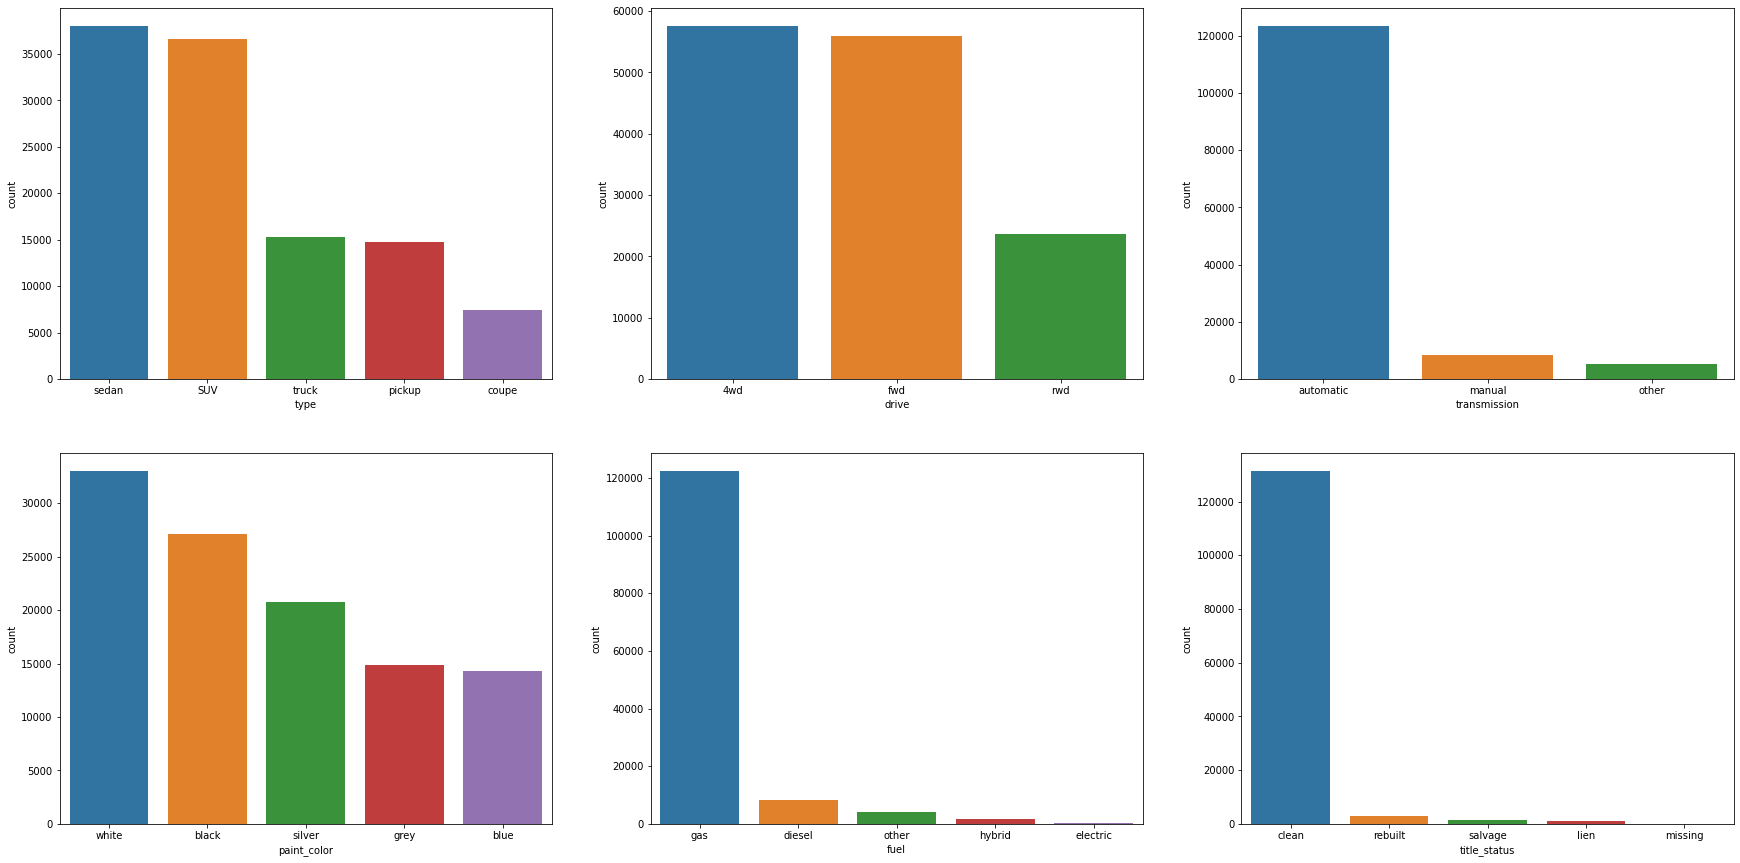

In [28]:
fig, ax =plt.subplots(2,3,figsize=(30, 15))
sns.countplot(x ='type',data = df,order=df['type'].value_counts().iloc[:5].index, ax = ax[0,0])
sns.countplot(x ='drive',data = df,order=df['drive'].value_counts().iloc[:5].index, ax = ax[0,1])
sns.countplot(x ='transmission',data = df,order=df['transmission'].value_counts().iloc[:5].index, ax = ax[0,2])
sns.countplot(x='paint_color',data=df,order=df['paint_color'].value_counts().iloc[:5].index, ax = ax[1,0])
sns.countplot(x='fuel',data=df,order=df['fuel'].value_counts().iloc[:5].index,ax=ax[1,1])
sns.countplot(x='title_status',data=df, order=df['title_status'].value_counts().iloc[:5].index,ax=ax[1,2])
fig.show()

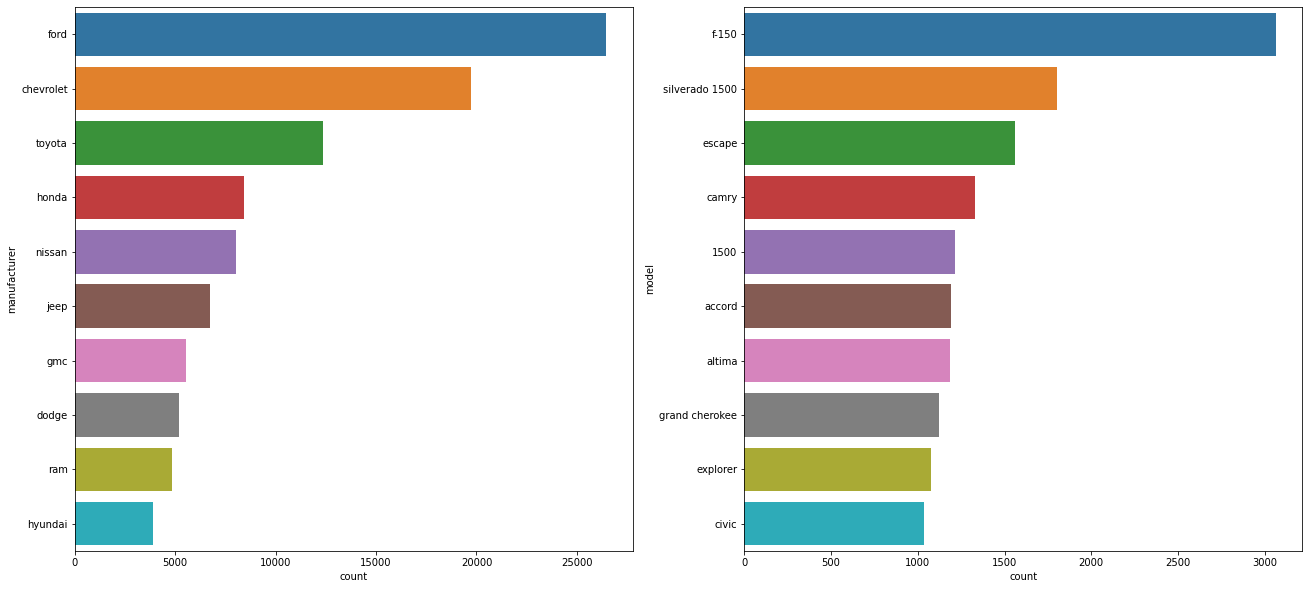

In [29]:
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:10].index, ax= ax[0])
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax = ax[1]) 
fig.show()

### Price - Which categories are more expensive/cheaper

#### Max Price

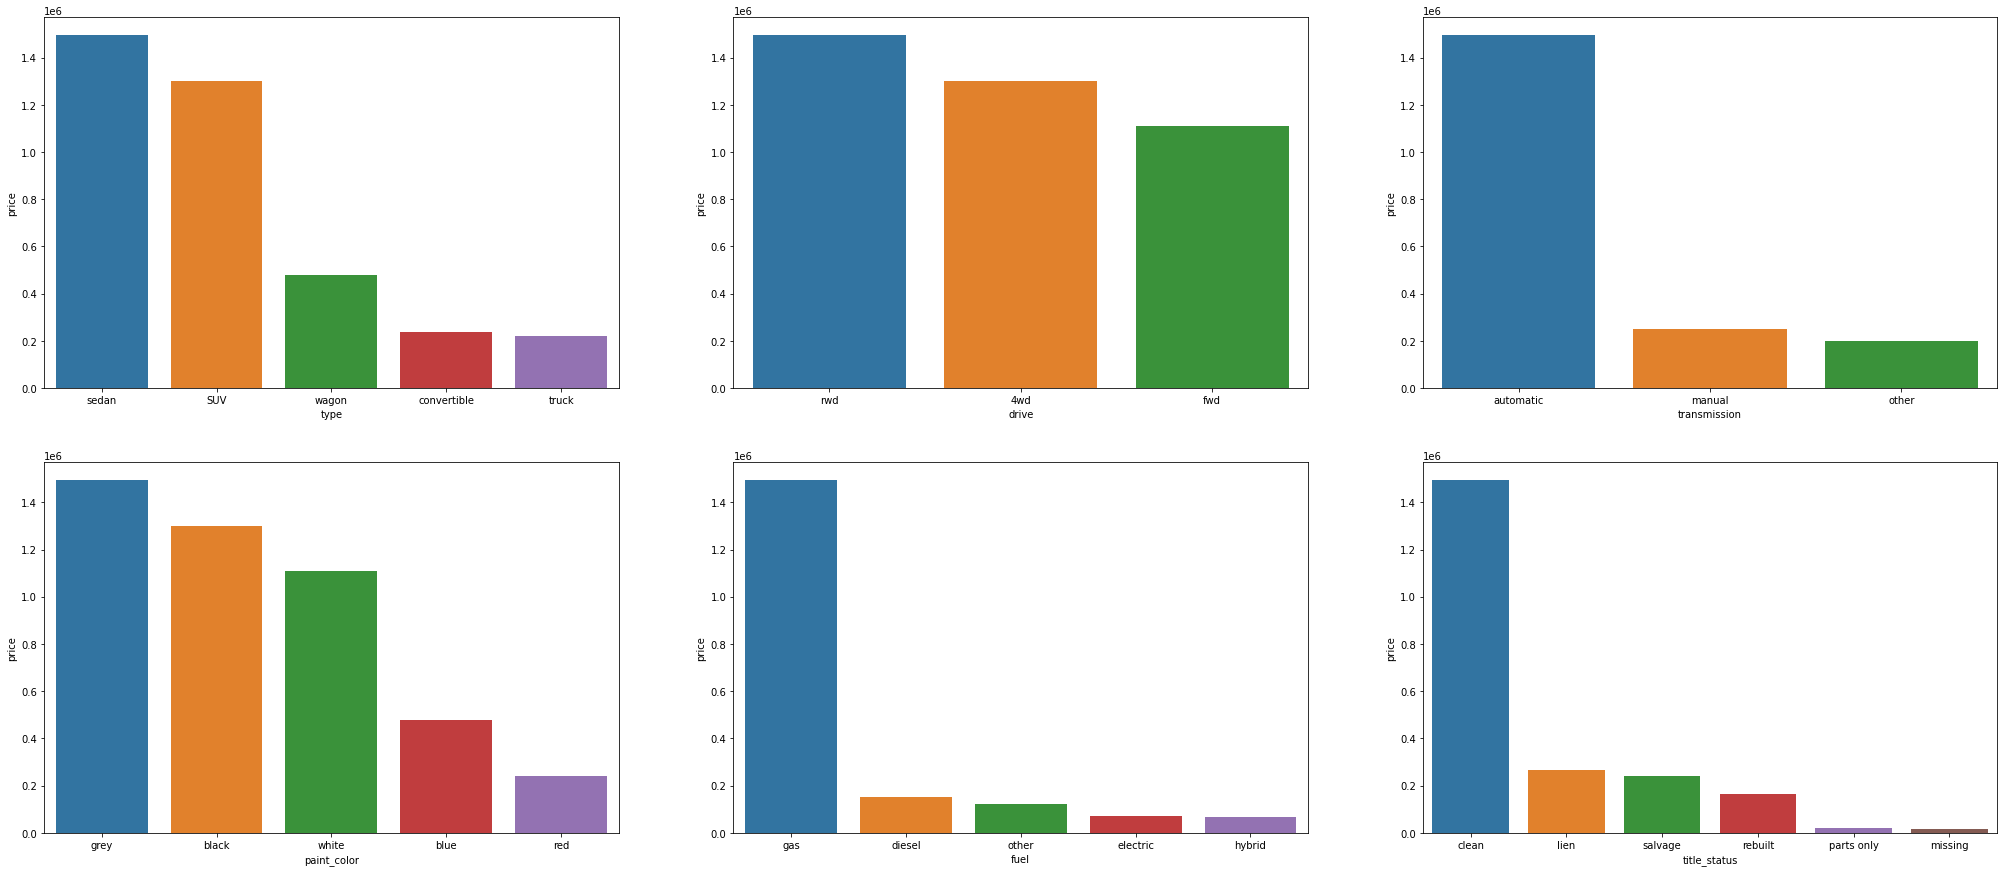

In [30]:
# Most expensive (Maximum)
order = df.groupby('type',as_index=False)['price'].max().sort_values('price', ascending=False).head()
order1 = df.groupby('drive',as_index=False)['price'].max().sort_values('price', ascending=False)
order2 = df.groupby('transmission',as_index=False)['price'].max().sort_values('price', ascending=False)
order3 = df.groupby('paint_color',as_index=False)['price'].max().sort_values('price', ascending=False).head()
order4 = df.groupby('fuel',as_index=False)['price'].max().sort_values('price', ascending=False)
order5 = df.groupby('title_status',as_index=False)['price'].max().sort_values('price', ascending=False)
fig, ax =plt.subplots(2,3,figsize=(35, 15))
sns.barplot(data=order, x='type', y='price', ax=ax[0,0])
sns.barplot(data=order1, x='drive', y='price', ax=ax[0,1])
sns.barplot(data=order2, x='transmission', y='price', ax=ax[0,2])
sns.barplot(data=order3, x='paint_color', y='price', ax=ax[1,0])
sns.barplot(data=order4, x='fuel', y='price', ax=ax[1,1])
sns.barplot(data=order5, x='title_status', y='price', ax=ax[1,2])
fig.show()

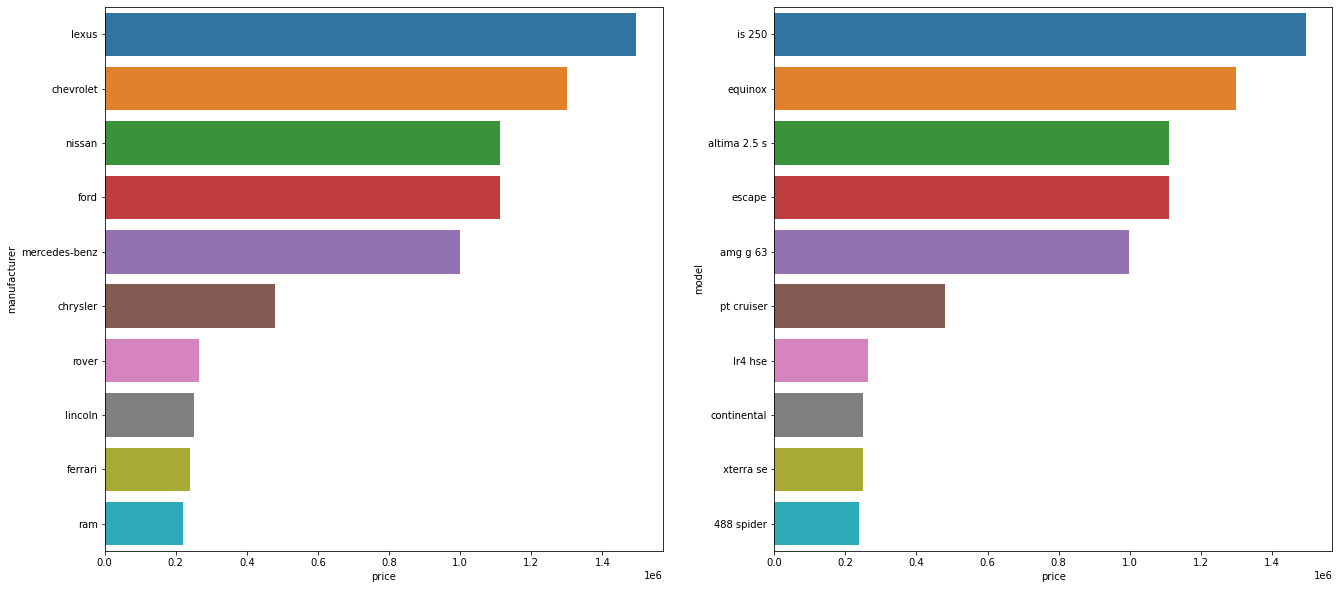

In [31]:
order = df.groupby('manufacturer',as_index=False)['price'].max().sort_values('price', ascending=False).head(10)
order1 = df.groupby('model',as_index=False)['price'].max().sort_values('price', ascending=False).head(10)
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.barplot(data=order, y='manufacturer', x='price', ax=ax[0])
sns.barplot(data=order1, y='model', x='price', ax=ax[1])
fig.show()

#### Average Price

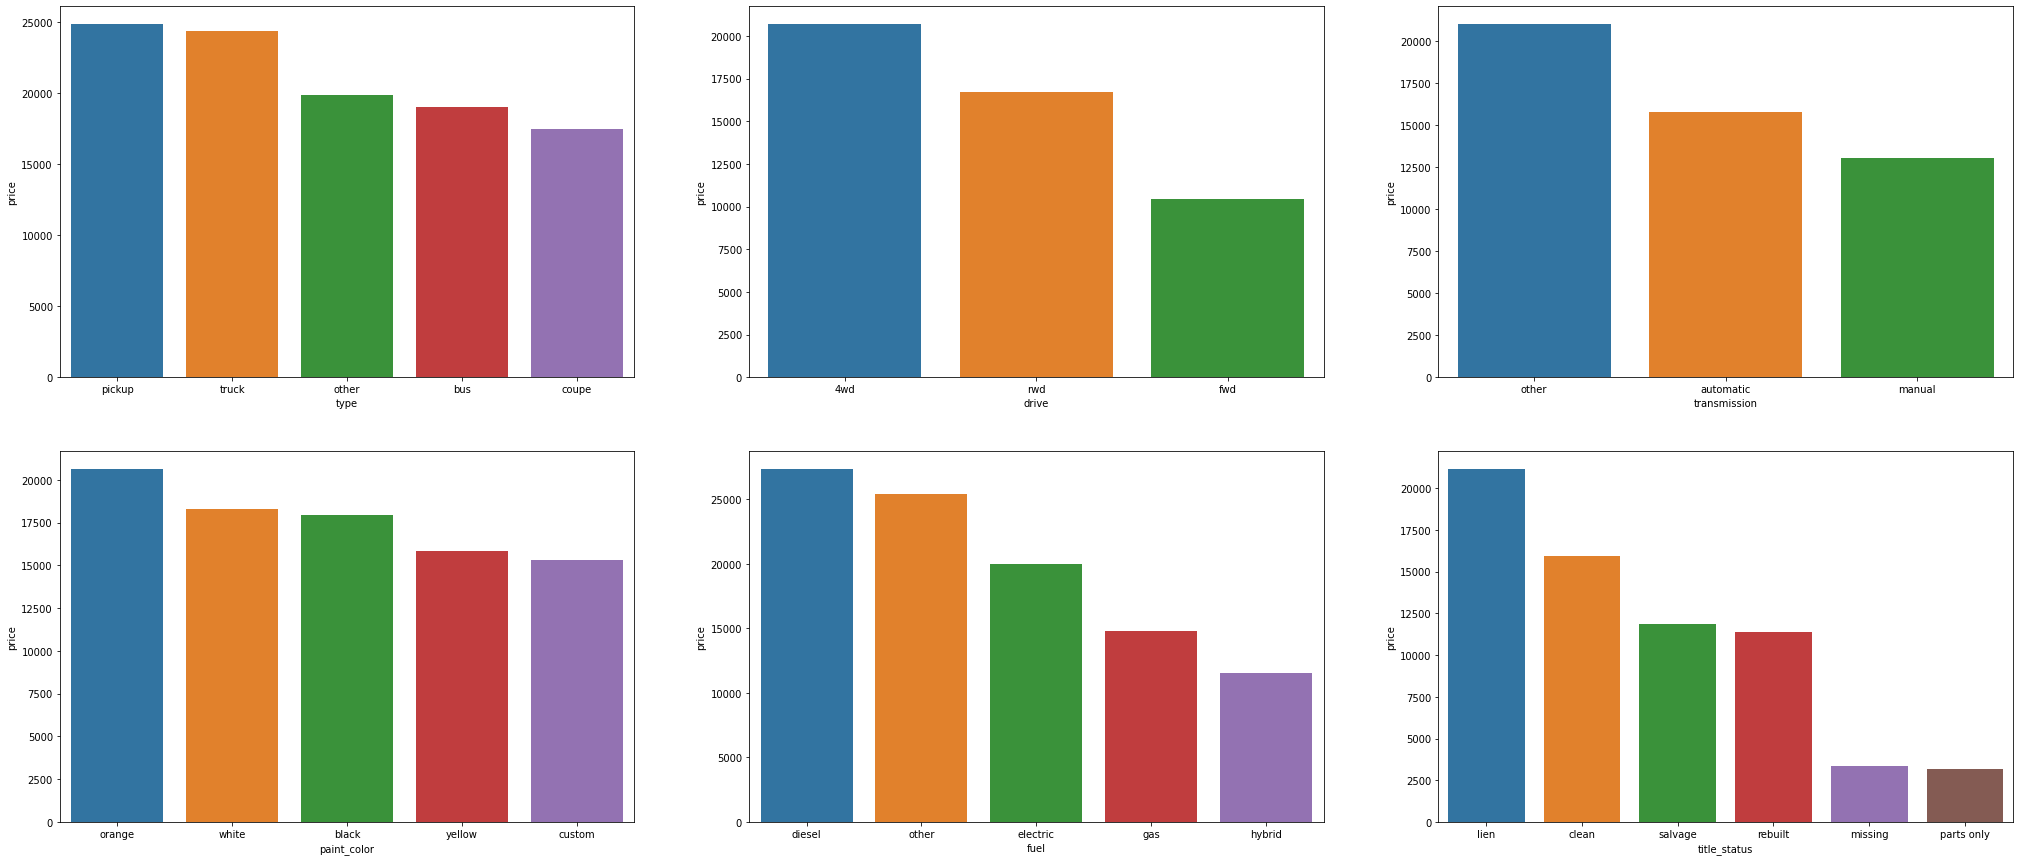

In [32]:
# Most expensive (Average)
order = df.groupby('type',as_index=False)['price'].mean().sort_values('price', ascending=False).head()
order1 = df.groupby('drive',as_index=False)['price'].mean().sort_values('price', ascending=False)
order2 = df.groupby('transmission',as_index=False)['price'].mean().sort_values('price', ascending=False)
order3 = df.groupby('paint_color',as_index=False)['price'].mean().sort_values('price', ascending=False).head()
order4 = df.groupby('fuel',as_index=False)['price'].mean().sort_values('price', ascending=False)
order5 = df.groupby('title_status',as_index=False)['price'].mean().sort_values('price', ascending=False)
fig, ax =plt.subplots(2,3,figsize=(35, 15))
sns.barplot(data=order, x='type', y='price', ax=ax[0,0])
sns.barplot(data=order1, x='drive', y='price', ax=ax[0,1])
sns.barplot(data=order2, x='transmission', y='price', ax=ax[0,2])
sns.barplot(data=order3, x='paint_color', y='price', ax=ax[1,0])
sns.barplot(data=order4, x='fuel', y='price', ax=ax[1,1])
sns.barplot(data=order5, x='title_status', y='price', ax=ax[1,2])
fig.show()

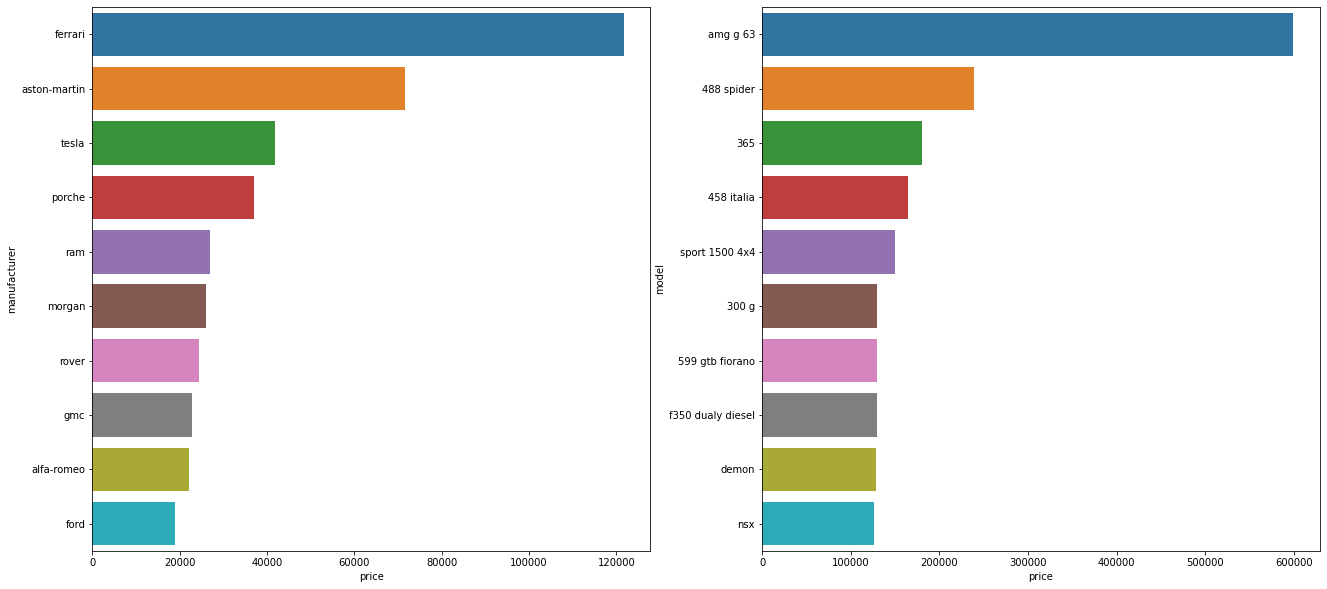

In [33]:
order = df.groupby('manufacturer',as_index=False)['price'].mean().sort_values('price', ascending=False).head(10)
order1 = df.groupby('model',as_index=False)['price'].mean().sort_values('price', ascending=False).head(10)
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.barplot(data=order, y='manufacturer', x='price', ax=ax[0])
sns.barplot(data=order1, y='model', x='price', ax=ax[1])
fig.show()

### Distributions and Correlation

In [34]:
fig = px.box(df, y="odometer")
fig.show()

In [35]:
px.box(df, y="price")

In [36]:
df.year.sort_values().unique()

array([1923., 1924., 1926., 1927., 1928., 1929., 1930., 1931., 1932.,
       1933., 1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021.])

In [37]:
df[df['year']==2021]

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,drive,type,paint_color,image_url,description,state,lat,long
6202,https://fortmyers.craigslist.org/lee/ctd/d/nap...,ft myers / SW florida,https://fortmyers.craigslist.org,22680,2021.0,hyundai,kona sel automatic,gas,8.0,clean,automatic,fwd,SUV,white,https://images.craigslist.org/00G0G_XWHC2AG9Kr...,2021 Hyundai Kona SEL Tamiami Hyundai800-499-...,fl,26.2280,-81.7660
27856,https://corvallis.craigslist.org/ctd/d/corvall...,corvallis/albany,https://corvallis.craigslist.org,68875,2021.0,gmc,yukon slt,gas,20.0,clean,automatic,4wd,SUV,white,https://images.craigslist.org/00D0D_3fWDfX6G9l...,Recent Arrival! 2021 GMC Yukon SLT Factory ...,or,44.5846,-123.2510
75334,https://medford.craigslist.org/cto/d/medford-c...,medford-ashland,https://medford.craigslist.org,3500,2021.0,ford,bronco ii,gas,170000.0,clean,automatic,4wd,SUV,blue,https://images.craigslist.org/00p0p_554Vvmu7wJ...,98% original & Reliable daily driver. 2.9 EFI...,or,42.3363,-122.8400
99092,https://nmi.craigslist.org/ctd/d/mc-bain-2021-...,northern michigan,https://nmi.craigslist.org,23732,2021.0,chevrolet,trax,gas,2.0,clean,automatic,4wd,SUV,grey,https://images.craigslist.org/00w0w_3esUVeebqq...,"2021 Chevrolet Trax LT -- $23,732 ☎ Call...",mi,44.2671,-85.2194
99355,https://nmi.craigslist.org/ctd/d/mc-bain-2021-...,northern michigan,https://nmi.craigslist.org,23502,2021.0,chevrolet,trailblazer,gas,100.0,clean,automatic,fwd,SUV,blue,https://images.craigslist.org/00I0I_hGKcJTm7o4...,"2021 Chevrolet TrailBlazer LT -- $23,502 ...",mi,44.2671,-85.2194
99431,https://nmi.craigslist.org/ctd/d/mc-bain-2021-...,northern michigan,https://nmi.craigslist.org,34992,2021.0,chevrolet,colorado,gas,2.0,clean,automatic,4wd,truck,black,https://images.craigslist.org/00P0P_ly1o0sXJCy...,"2021 Chevrolet Colorado Z71 -- $34,992 ☎...",mi,44.2671,-85.2194
187242,https://chicago.craigslist.org/chc/cto/d/chica...,chicago,https://chicago.craigslist.org,1650,2021.0,nissan,altima 2.5 sl,gas,0.0,clean,automatic,fwd,sedan,black,https://images.craigslist.org/00u0u_bSUIxpXAyg...,NEW MASTER TOW DOLLY 2021 80THDEB - THIS IS TH...,il,41.7939,-87.6937
236239,https://baltimore.craigslist.org/cto/d/notting...,baltimore,https://baltimore.craigslist.org,1800,2021.0,mercedes-benz,benz,other,400.0,clean,automatic,4wd,other,black,https://images.craigslist.org/00S0S_5LzvASdCdf...,NO EMAILS PLEASE CALL RIMS AND TIRES ARE L...,md,39.3914,-76.4871
317039,https://stlouis.craigslist.org/cto/d/truesdale...,"st louis, MO",https://stlouis.craigslist.org,5500,2021.0,ford,f350 super duty,diesel,800000.0,clean,automatic,4wd,pickup,black,https://images.craigslist.org/00f0f_sN6Fven9sk...,2001 Ford F350 Diesel 7.3L V8 Automatic 4WD Cr...,il,38.8050,-91.1740
378802,https://raleigh.craigslist.org/cto/d/durham-ne...,raleigh / durham / CH,https://raleigh.craigslist.org,23500,2021.0,hyundai,kona sel,gas,84.0,clean,automatic,fwd,SUV,black,https://images.craigslist.org/00Y0Y_8Ya8XZ3xQ9...,Thanks for looking! This car was JUST driven ...,nc,35.9967,-78.8966


In [38]:
df.year.value_counts()

2017.0    13718
2015.0     9427
2016.0     9195
2014.0     9156
2013.0     9154
          ...  
1938.0        3
1928.0        2
1924.0        2
1923.0        2
1926.0        1
Name: year, Length: 94, dtype: int64

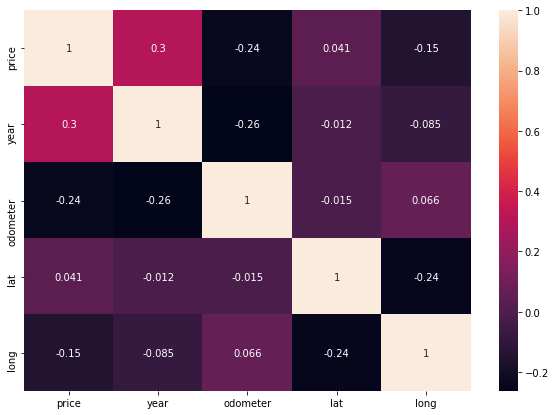

In [39]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)

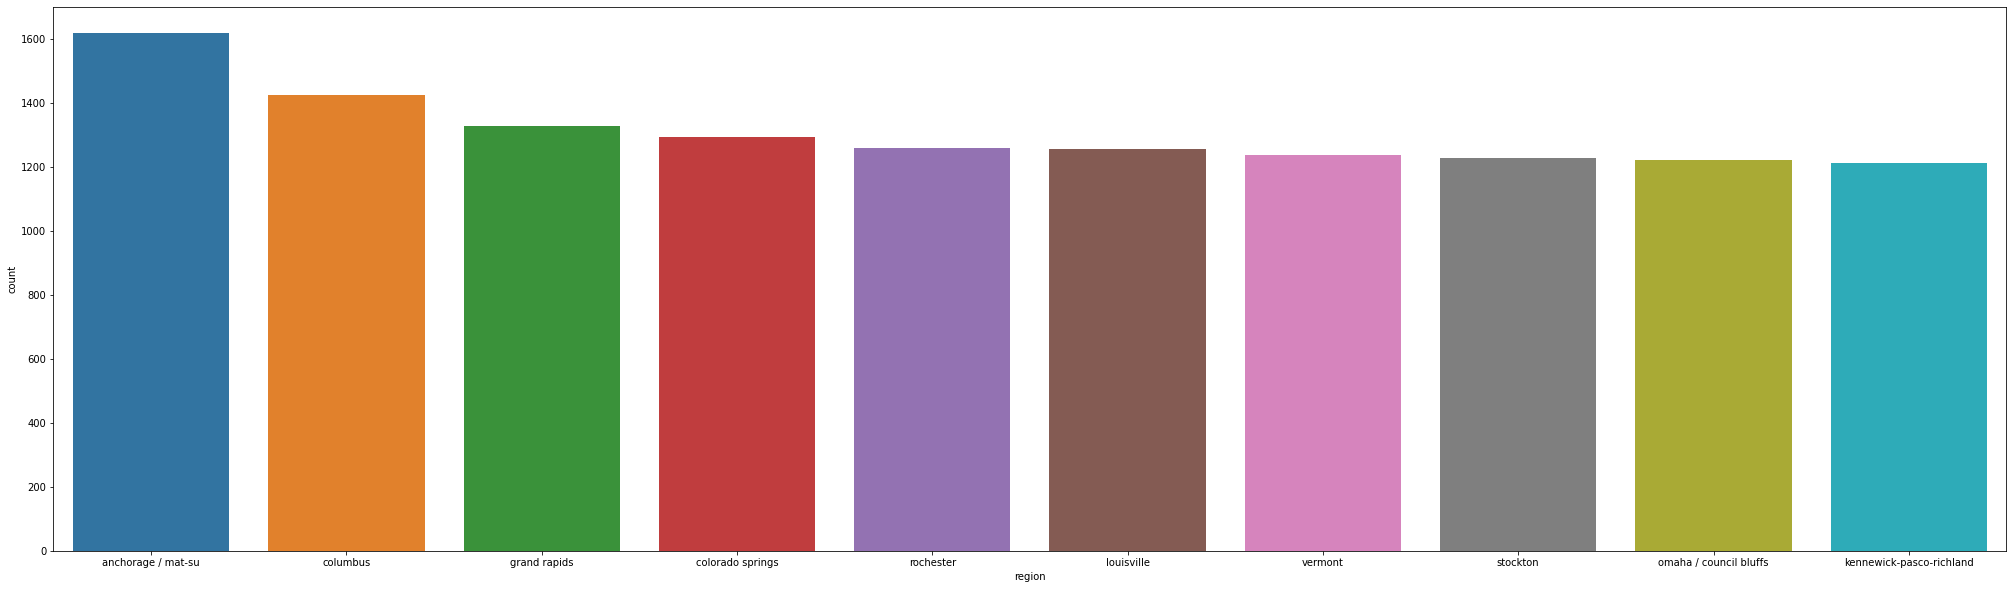

In [40]:
plt.figure(figsize=(35, 10))
sns.countplot(x='region',data=df, order=df['region'].value_counts().iloc[:10].index)

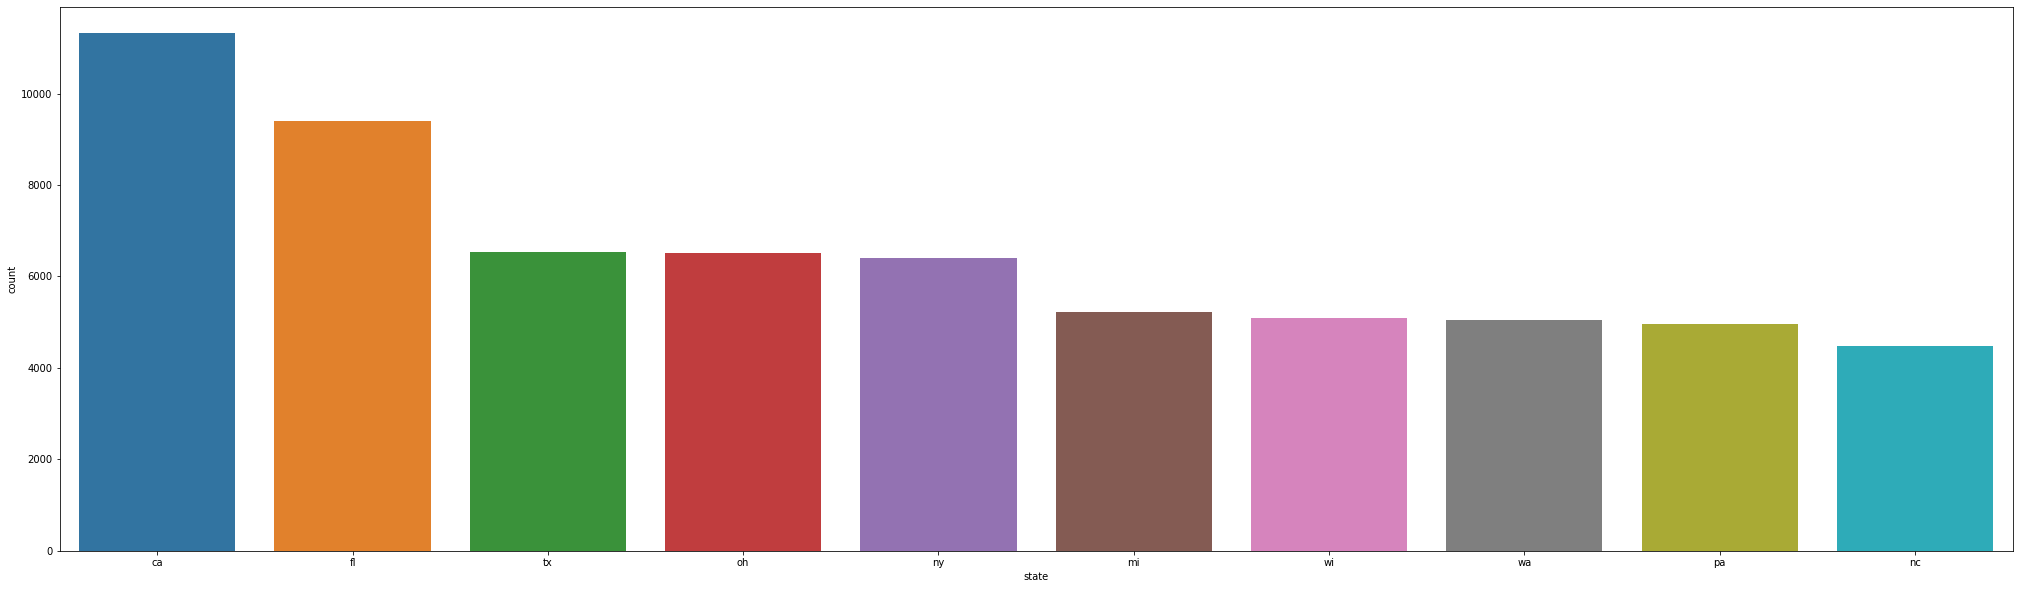

In [41]:
plt.figure(figsize=(35, 10))
sns.countplot(x='state',data=df, order=df['state'].value_counts().iloc[:10].index)

In [42]:
df['state'] = df['state'].str.upper()

In [43]:
state_price = df.groupby(['state'], as_index=False)['price'].mean()

In [44]:
px.choropleth(state_price, locations='state', locationmode='USA-states', scope='usa', title='Price in States', color='price', color_continuous_scale='mint', hover_name='state', height=600)